# United States H-1B Work Visas Analysis

The aim of this exploratory analysis is to find interesting patterns in the H-1B Labor Condition Application (LCA) process, specifically to learn about which applications get certified or denied and what employers can do to increase their chances of obtaining H-1B work visas for their international employees.   

A **case status** is the status of the H-1B application after LCA processing. LCA either certifies or denies the application. Once applications are certified, they are sent to USCIS for H-1B approval. For Further information on the H-1B application process, see this [article](https://redbus2us.com/what-is-h1b-lca-why-file-it-salary-processing-times-dol/).

**Inspiration:**

1. What are the top 10 occupations for H-1B visas with certified status?
2. Which company hires the most data scientists based on H-1B applications?
3. What is the average salary for data scientists based on H-1B applications? How does it compare to the average salary of all H-1B applicants? 
4. Which state has the highest proportion of denied to total H-1B applications? And by state popuplation?
5. What industries are in the top 5 percentile of H-1B applications?
6. What month is the tipping point for a high rate of denied applications? 

**Insights from the analysis:**
- Applications software developers, computer systems analysts, computer programmers, and other computer occupations topped the list of occupations that received H-1B certified status. Others occupations include management analysts, accountants and auditors, network administators, and financial analysts.
- Microsoft hires the most data scientists (40), outpacing Facebook's distant second of 12 hires, and Uber's distant third of 6 hires.
- H-1B certified Data Scientists earn an average of \$88,646 which is 17% more than the average of all H-1B visa applicants, \$75,735.
- The state of Hawaii has the highest rate of H-1B visas denied (13%). This makes sense since Hawaii is mainly a tourist economy and most certified H-1B applications are from the high-tech/computer and Finance industries. 
- The state of Delaware has the highest rate of H-1B denied by population. Delaware's economy is primarily agriculture, manufacturing, and mining.
- 52 industries are in the top 5 percentile of applications. Holding top rank is Computer Programming Services.
- H-1B visa applications are more likely to obtain certified status when applied early in the year. A significant number of applications are denied starting from October. 

**Key take-aways gained from this analysis are:**
1. The competition for H-1B visas is very high as there are more applicants (93,533) than visas (80,000). The timeliness of the application submission is critical. To increase their chances of success, employers should submit their H-1B applications before October.
2. Good news for H-1B data scientists! They earn 17% more than the average H-1B applicants.
3. If you're a data scientist and a non-citizen of the US, apply first to Microsoft, Facebook and Uber.

# About the data   

This project uses three diffferent data sets:
- The H-1B dataset used in this project was obtained from [superdatascience.com](superdatascience.com). It is a modified version of the original dataset to simplify the analysis. The original data source can be downloaded from the [United States Department of Labor](https://www.foreignlaborcert.doleta.gov/performancedata.cfm) website.
- The dataset containing NAICS (North America Industry Classification System) codes can be downloaded from [data.gov] (https://catalog.data.gov/dataset/north-american-industry-classification-system-naics) website. 
- The populations of US states was obtained from this [Wikipedia](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population) webpage and stored a csv file.

# Import Libraries

In [1]:
# Required packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
# Read the H-1B visas dataset
visas = pd.read_csv('H-1B disclosure data.csv', encoding='latin1')

In [3]:
# Check dimensions of the dataset
visas.shape    # verified dataset has 93,533 rows and 15 columns

(93533, 15)

# Explore data

In [4]:
visas.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578


In [5]:
# Show the structure of the dataframe
visas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93533 entries, 0 to 93532
Data columns (total 15 columns):
CASE_NUMBER              93533 non-null object
CASE_STATUS              93533 non-null object
CASE_SUBMITTED           93533 non-null object
DECISION_DATE            93533 non-null object
VISA_CLASS               93533 non-null object
EMPLOYMENT_START_DATE    93529 non-null object
EMPLOYMENT_END_DATE      93532 non-null object
EMPLOYER_NAME            93527 non-null object
EMPLOYER_STATE           93528 non-null object
EMPLOYER_POSTAL_CODE     93533 non-null object
JOB_TITLE                93533 non-null object
SOC_CODE                 93533 non-null object
SOC_NAME                 93533 non-null object
NAICS_CODE               93533 non-null int64
PREVAILING_WAGE          93533 non-null int64
dtypes: int64(2), object(13)
memory usage: 10.7+ MB


The dataframe is pretty clean. It requires some minor data cleaning and we will address the cleaning as we need the data in our analysis.   

### 1. What are the top 10 occupations for H-1B visas with certified status?

In [6]:
#The number of cases in the visas dataset
visa_cases = visas.CASE_NUMBER.count()
print("number of visa cases :", visa_cases)

# The case status categories
status_cat = visas.CASE_STATUS.unique()
print("status categories: ", status_cat)

number of visa cases : 93533
status categories:  ['CERTIFIED' 'CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'DENIED']


A **certified status** means that an applicant is eligible to file for a H-1B visa. In this case, we are interested in both certified statuses.

In [7]:
# Subset just the certified and certified-withdrawn cases
certified_visas = visas[(visas.CASE_STATUS == 'CERTIFIED') | (visas.CASE_STATUS == 'CERTIFIED-WITHDRAWN')]

# The number of cases in the certified visas dataset
cert_visas = certified_visas.CASE_NUMBER.count()
print("certified visas: ", cert_visas)

# The number of different occupations in the certified visas dataset
distinct_occ = len(certified_visas.SOC_NAME.unique())
print("distinct occupations: ", distinct_occ)


certified visas:  88974
distinct occupations:  491


The top 10 occupation with a H-1B certified status:

In [8]:
# Group, count, and sort 
top_10_occupation = certified_visas.groupby('SOC_NAME').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False)
top_10_occupation[:10]

,SOC_NAME,COUNT
433,"SOFTWARE DEVELOPERS, APPLICATIONS",18369
124,COMPUTER SYSTEMS ANALYSTS,13866
114,COMPUTER PROGRAMMERS,11005
108,"COMPUTER OCCUPATIONS, ALL OTHER",7133
123,COMPUTER SYSTEMS ANALYST,3387
438,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",2814
280,MANAGEMENT ANALYSTS,1784
2,ACCOUNTANTS AND AUDITORS,1657
325,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,1299
204,FINANCIAL ANALYSTS,1148


Software and computer related occupations rank at the top of the list with management and finance occupations following them. 

### 2. Which company hires the most data scientists based on H-1B visa applications?


In [10]:
# Subset, group, size, and sort
ds_gb_company = visas[visas.JOB_TITLE == 'DATA SCIENTIST'].groupby('EMPLOYER_NAME').size().reset_index(name='COUNT')
ds_gb_company = ds_gb_company.sort_values(by='COUNT', ascending=False)
ds_gb_company.head()

# The company with the most data scientist hires
ds_gb_company[:4]

,EMPLOYER_NAME,COUNT
47,MICROSOFT CORPORATION,40
21,"FACEBOOK, INC.",12
77,"UBER TECHNOLOGIES, INC.",6
71,"THE NIELSEN COMPANY (US), LLC",4


Microsoft Coporation hires the most H-1B data scientists by far. In fact, Microsoft hires 3 times as many data scientists as Facebook (runner-up).

### 3. What is the average salary for data scientists based on H-1B visa applications? How does it compare to the average salary of all H-1B applicants?
 

First, we will find the mean salary for all positions and the mean salary for the data scientists position. Then we will calculate the difference and percent difference to make the comparison.

In [11]:
# Compute the mean salary for all applications
all_positions_salary = visas['PREVAILING_WAGE'].mean()
print('The average salary for all H-1B positions is ${:,.0f}'.format(all_positions_salary))

# Compute the mean salary for data scientist applications
ds_salary = visas['PREVAILING_WAGE'][visas.JOB_TITLE == 'DATA SCIENTIST'].mean()
print('The average salary for H-1B data scientists is ${:,.0f}'.format(ds_salary))

# Compute the difference and percent difference in salary
salary_diff = ds_salary - all_positions_salary
salary_percent_diff = (salary_diff / all_positions_salary) *100
print('Data Scientists earn on average ${:,.0f} ({:.1f}%) more than the average of all H-1B visa applicants'.format(salary_diff, salary_percent_diff))

The average salary for all H-1B positions is $75,735
The average salary for H-1B data scientists is $88,646
Data Scientists earn on average $12,911 (17.0%) more than the average of all H-1B visa applicants


### 4. Which state has the highest proportion of denied to total H-1B visa applications? By state popuplation?


The visas dataset does not have data on state population. We will have to read in the state population dataset, create a dataframe to store the calculated fields for visas by state and merge it the visas dataset so that we can calculate the proportion of denied applications by state and by population.  

In [12]:
# Get the number of denied cases
denied_apps = visas['CASE_STATUS'][visas.CASE_STATUS == 'DENIED'].count()
print("number of cases denied: ", denied_apps)

number of cases denied:  1369


Let's read-in the states population dataset:

In [13]:
# Read the states dataset
states = pd.read_csv('states population.csv')

# Check the number of states in the dataset
#states.shape    # verified dataset has 50 rows and 3 columns
print("dataset size: ",states.shape ) # verified dataset has 50 rows and 3 columns
states.head()

dataset size:  (50, 3)


,State abbreviation,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503


Create a new dataframe to store all the numbers needed to perform the calculation:

In [14]:
# Create a new dataframe with the states values
visas_by_state = pd.DataFrame(states['State abbreviation'].unique())   
visas_by_state.columns = ['state']

# Create three more columns filled with zeros
visas_by_state['denied'] = np.zeros(len(visas_by_state))
visas_by_state['applicants'] = np.zeros(len(visas_by_state))
visas_by_state['population'] = np.zeros(len(visas_by_state))

# Set the index to use the states as row labels
visas_by_state.set_index(visas_by_state.state, inplace=True, drop=True)

# Show the new dataframe
# visas_by_state.head()

# Fill the new dataframe with the calculated values that we need:
for st in visas_by_state.state:
    
    # fill the number of denied visas by state
    visas_by_state.loc[st, 'denied'] = len(visas[(visas.CASE_STATUS == 'DENIED') & (visas.EMPLOYER_STATE == st)])
    
    # fill the number of applicants by state
    visas_by_state.loc[st, 'applicants'] = len(visas[visas.EMPLOYER_STATE == st])
    
    # fill the population by state
    visas_by_state.loc[st, 'population'] = states[states['State abbreviation'] == st]['Population estimate'].sum()


# Create two additional columns to represent the proportion of denied by applications and by population
visas_by_state['denied_by_application'] = np.divide(visas_by_state.denied, visas_by_state.applicants)
visas_by_state['denied_by_population'] = np.divide(visas_by_state.denied, visas_by_state.population)

visas_by_state.head()
    

,state,denied,applicants,population,denied_by_application,denied_by_population
state,,,,,,
CA,CA,257.0,15293.0,39250017.0,0.016805,0.000007
TX,TX,106.0,12090.0,27862596.0,0.008768,0.000004
FL,FL,74.0,3025.0,20612439.0,0.024463,0.000004
NY,NY,164.0,6606.0,19745289.0,0.024826,0.000008
PA,PA,77.0,3704.0,12802503.0,0.020788,0.000006


Now, let's merge the visa-by-state and 'states' dataset:

In [15]:
# Merge the datasets
visas_by_state = pd.merge(visas_by_state, states, left_on='state', right_on='State abbreviation')

# Explore the merged dataframe
visas_by_state.head()

,state,denied,applicants,population,denied_by_application,denied_by_population,State abbreviation,State,Population estimate
0,CA,257.0,15293.0,39250017.0,0.016805,0.000007,CA,California,39250017
1,TX,106.0,12090.0,27862596.0,0.008768,0.000004,TX,Texas,27862596
2,FL,74.0,3025.0,20612439.0,0.024463,0.000004,FL,Florida,20612439
3,NY,164.0,6606.0,19745289.0,0.024826,0.000008,NY,New York,19745289
4,PA,77.0,3704.0,12802503.0,0.020788,0.000006,PA,Pennsylvania,12802503


We are now ready to answer the two questions:

In [16]:
# Show the state with the highest rate of denied visas by application
highest_denied_by_app = visas_by_state[['State', 'State abbreviation', 'denied_by_application']].sort_values(by='denied_by_application', ascending=False) 
highest_denied_by_app[:1]

,State,State abbreviation,denied_by_application
39,Hawaii,HI,0.130435


Hawaii is the state with the highest rate of denied H-1B applications (13%). This makes sense since Hawaii is mainly a tourism industry and most certified H-1B applications are from the high-tech/computer and Finance. 

In [17]:
# Show the state with the highest rate of denied visas by population
highest_denied_by_pop = visas_by_state[['State', 'State abbreviation', 'denied_by_population']].sort_values(by='denied_by_population', ascending=False) 
highest_denied_by_pop[:1]

,State,State abbreviation,denied_by_population
44,Delaware,DE,0.000013


Delaware is the state with the highest rate of H-1B denied by population. Research shows the ecomomy of Delaware consists of the primary industry (such as agriculture, manufacturing, and mining) and the services industry (such as Finance, Insurance, and Real-estate). These two sectors employ occumpations that do not rank very high in the top occupations list for H-1B visas.

### 5. What industries are in the top 5 percentile of H-1B visa applications?


Although the visas dataset does contain the NAICS code for each application, it does not have the corrresponding description of the code. We will read the NAICS dataset and merge its NAICS tittles to the visas dataset.  

In [19]:
# Read the NAICS dataset
naics = pd.read_csv('naics codes.csv', encoding='latin1')

# Check dimensions of the dataset
print("dataset dim: ", naics.shape)    # verified dataset has 4673 rows and 3 columns

# Explore the dataset
naics.head()

dataset dim:  (4673, 3)


,NAICS Code,NAICS Title,Unnamed: 2
0,11,"Agriculture, Forestry, Fishing and Hunting",NaN
1,21,"Mining, Quarrying, and Oil and Gas Extraction",NaN
2,22,Utilities,NaN
3,23,Construction,NaN
4,42,Wholesale Trade,NaN


The naics code dataset needs some cleaning.

In [20]:
# Remove the last column with NaN values
naics.drop('Unnamed: 2', axis=1, inplace=True)

# Rename the columns
naics.columns = ['NAICS_CODE', 'NAICS_TITLE']

In [21]:
# Investigate if there duplicates in the dataset
naics.groupby('NAICS_CODE').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False).head()

,NAICS_CODE,COUNT
1219,113310,4
1926,441320,4
1911,424920,4
1912,424930,4
1914,424950,4


In [22]:
# Drop the duplicates, but leave one of each
naics.drop_duplicates(subset=['NAICS_CODE'], keep='first', inplace=True)

# Reset the index
naics.groupby('NAICS_CODE').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head()

,NAICS_CODE,Count
0,11,1
1629,332322,1
1622,332214,1
1623,332215,1
1624,332216,1


The naics code dataset is ready to be merged with the visas dataset:

In [23]:
# Merge visas and naics datasets
visas_by_industry = pd.merge(visas, naics, on='NAICS_CODE')

# Explore the merged dataset
visas_by_industry

# Group the visas by industry
visas_gr_by_industry = visas_by_industry.groupby('NAICS_TITLE').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False)
visas_gr_by_industry.head()

,NAICS_TITLE,COUNT
234,Custom Computer Programming Services,31941
201,Computer Systems Design and Related Services,6742
200,Computer Systems Design Services,5311
180,"Colleges, Universities, and Professional Schools",5100
499,"Management, Scientific, and Technical Consulti...",3689


Let's find out the industries in the top 5 percentile of H-1B visa applications:

In [32]:
# Compute the 95th percentile
the_95_percentile = np.percentile(a=visas_gr_by_industry.COUNT, q=95)

# Filter just the top 5 percentile of industries
top_5_percentile = visas_gr_by_industry[visas_gr_by_industry.COUNT >= the_95_percentile]
top_5_percentile

print("Number of industries in the 95th percentile: ", int(the_95_percentile))
print("Number of industries in the to 5 percentile: ",len(top_5_percentile))
print("\n Industries in the top 5 percentile: ")
top_5_percentile

Number of industries in the 95th percentile:  154
Number of industries in the to 5 percentile:  52

 Industries in the top 5 percentile: 


,NAICS_TITLE,COUNT
234,Custom Computer Programming Services,31941
201,Computer Systems Design and Related Services,6742
200,Computer Systems Design Services,5311
180,"Colleges, Universities, and Professional Schools",5100
499,"Management, Scientific, and Technical Consulti...",3689
902,Software Publishers,2640
654,Other Computer Related Services,1855
597,Offices of Certified Public Accountants,1476
298,Engineering Services,1406
12,Administrative Management and General Manageme...,1270


There are a  total of 52 industries in the top 5 percentile of all H-1B visa applications. Holding top rank is Computer Programming Services with 31,941 applications. It outpaced Computer Systems Design and Related Services by 50.7%.

### 6. What month is the tipping point for a high rate of denied applications?

In [36]:
# Filter just the dates of denied visas
denied_visas = visas[['CASE_NUMBER','CASE_SUBMITTED', 'DECISION_DATE']][visas.CASE_STATUS == 'DENIED']

# Extract the month from both dates
denied_visas['Month_submitted'] =  pd.DatetimeIndex( denied_visas.CASE_SUBMITTED).month
denied_visas['Month_decision'] =  pd.DatetimeIndex( denied_visas.DECISION_DATE).month

# Explore the denied_visas dataset
denied_visas.head()

,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,Month_submitted,Month_decision
1881,I-200-14311-284928,20-12-16,22-12-16,12,12
2533,I-200-15060-565396,29-09-16,03-10-16,9,3
3556,I-200-15139-183403,05-10-16,07-10-16,5,7
4179,I-200-15251-717050,12-12-16,14-12-16,12,12
6754,I-200-16075-799719,15-11-16,17-11-16,11,11


<function matplotlib.pyplot.show>

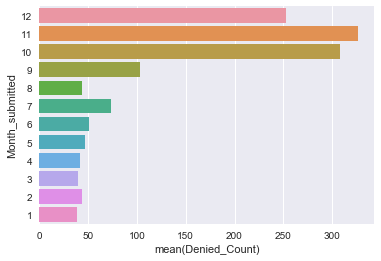

In [37]:
# Group by month of submitted dates
denied_visas_gr_by_month_sub = denied_visas.groupby('Month_submitted').size().reset_index(name='Denied_Count')
denied_visas_gr_by_month_sub = denied_visas_gr_by_month_sub.sort_values(by='Month_submitted', ascending=False)  

# Plot visas denied grouped by month submitted dates
sns.barplot(x='Denied_Count', y='Month_submitted', data=denied_visas_gr_by_month_sub, 
            order=denied_visas_gr_by_month_sub.Month_submitted, orient='h')
plt.show

It appears when you submit your H-1B visa application influences likely your application will be denied. The data show H-1B applications submitted in the last three months of the year will be much more likely to be denied. This makes sense since the USCIS has a cap on H-1B issuance each year. For more information on H1-B process, go to this [link](https://www.immi-usa.com/h1b-application-process-step-by-step-guide/).   


# Conclusion

With a thriving economy in the US, many companies are petitioning H-1B working visas for their foreign national workers. This exploratory analysis uncovered insightful facts and trends about the H-1B visa applications:

- The majority of the H-1B certified applications went to applicants working in the the High-Tech/Computer industry.
- By far, Microsoft hires the most data scientists (40) whic is 3X more hires than Facebook (runner-up).
- Data scientists earn an average of \$88,646 which is 17% more than the average of all applicants.
- The state of Hawaii has highest rate of denied H-1B applications (13 percent) while the state of Delaware has the highest rate of H-1B denied by population. 
- 52 industries are in the top 5 percentile of applications. Holding top rank is Computer Programming Services with 31,941 H-1B visa applications. 
- The month of H1-B application submission plays a role on how likely the application will be denied. Applications are more likey to get certified when submitted early in the year. They are likely to be denied starting from October.  

The key insight gained from this analysis is the timeliness of application submission. This piece of information is very useful to employers. To increase their chances of success, employers should submit their H-1B visa applications as early as possible in the year. A denied application means that the foreign national workers cannot start working for the company. This would have a huge impact on the business bottomline.